In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


accident = pd.read_csv('Data/FARS2021NationalCSV/accident.csv', encoding='ISO-8859-1')
event = pd.read_csv('Data/FARS2021NationalCSV/cevent.csv', encoding='ISO-8859-1')
accident.columns = accident.columns.str.strip()
event.columns = event.columns.str.strip()




In [17]:
accident_columns_to_drop = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                   36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
                   64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]

# Drop the specified columns by index
accident = accident.drop(accident.columns[accident_columns_to_drop], axis=1)

event_columns_to_drop = [9, 10, 11, 12]
event = event.drop(event.columns[event_columns_to_drop], axis = 1)

In [18]:
df = pd.merge(accident, event, on='ST_CASE', how='inner')
df

,STATE_x,STATENAME_x,ST_CASE,DAYNAME,DAY_WEEKNAME,HOUR,MINUTE,STATE_y,STATENAME_y,EVENTNUM,VNUMBER1,AOI1,AOI1NAME,SOE,SOENAME
0,1,Alabama,10001,12,Friday,22,10,1,Alabama,1,1,12,12 Clock Point,12,Motor Vehicle In-Transport
1,1,Alabama,10002,11,Thursday,18,0,1,Alabama,1,1,55,Non-Harmful Event,64,Ran Off Roadway - Left
2,1,Alabama,10002,11,Thursday,18,0,1,Alabama,2,1,11,11 Clock Point,25,Concrete Traffic Barrier
3,1,Alabama,10002,11,Thursday,18,0,1,Alabama,3,1,55,Non-Harmful Event,69,Re-entering Roadway
4,1,Alabama,10002,11,Thursday,18,0,1,Alabama,4,1,55,Non-Harmful Event,63,Ran Off Roadway - Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112720,56,Wyoming,560102,15,Wednesday,10,34,56,Wyoming,1,1,55,Non-Harmful Event,63,Ran Off Roadway - Right
112721,56,Wyoming,560102,15,Wednesday,10,34,56,Wyoming,2,1,0,Non-Collision,1,Rollover/Overturn
112722,56,Wyoming,560103,19,Sunday,17,9,56,Wyoming,1,1,12,12 Clock Point,8,Pedestrian
112723,56,Wyoming,560104,20,Monday,6,30,56,Wyoming,1,1,55,Non-Harmful Event,68,Cross Centerline


In [19]:
print(df.shape)

(112725, 15)


In [20]:
df = df.drop(columns=['STATE_y', 'STATENAME_y'])

In [21]:
numerical_vars = df.select_dtypes(include=[np.number])
numerical_summary = numerical_vars.describe()

# Calculate variance for numerical variables (since it's not included in the describe method by default)
variance = numerical_vars.var()

# Add variance to the summary statistics
numerical_summary.loc['variance'] = variance

numerical_summary

,STATE_x,ST_CASE,DAYNAME,HOUR,MINUTE,EVENTNUM,VNUMBER1,AOI1,SOE
count,112725.000000,1.127250e+05,112725.000000,112725.000000,112725.000000,112725.000000,112725.000000,112725.000000,112725.000000
mean,27.475697,2.756416e+05,15.631076,13.311040,29.082990,2.706480,1.277764,34.825301,35.383633
std,16.452688,1.644243e+05,8.871515,10.491582,18.481930,3.216187,2.629577,30.664740,25.523239
min,1.000000,1.000100e+04,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,12.000000,1.222640e+05,8.000000,7.000000,14.000000,1.000000,1.000000,12.000000,12.000000
50%,27.000000,2.704430e+05,16.000000,14.000000,30.000000,2.000000,1.000000,12.000000,34.000000
75%,42.000000,4.207750e+05,23.000000,19.000000,44.000000,3.000000,1.000000,55.000000,63.000000
max,56.000000,5.601040e+05,31.000000,99.000000,99.000000,134.000000,130.000000,99.000000,99.000000
variance,270.690950,2.703535e+10,78.703777,110.073297,341.581745,10.343860,6.914676,940.326272,651.435726


/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_5584/2693093590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, y=column_name, order=data[column_name].value_counts().index,  palette="husl")


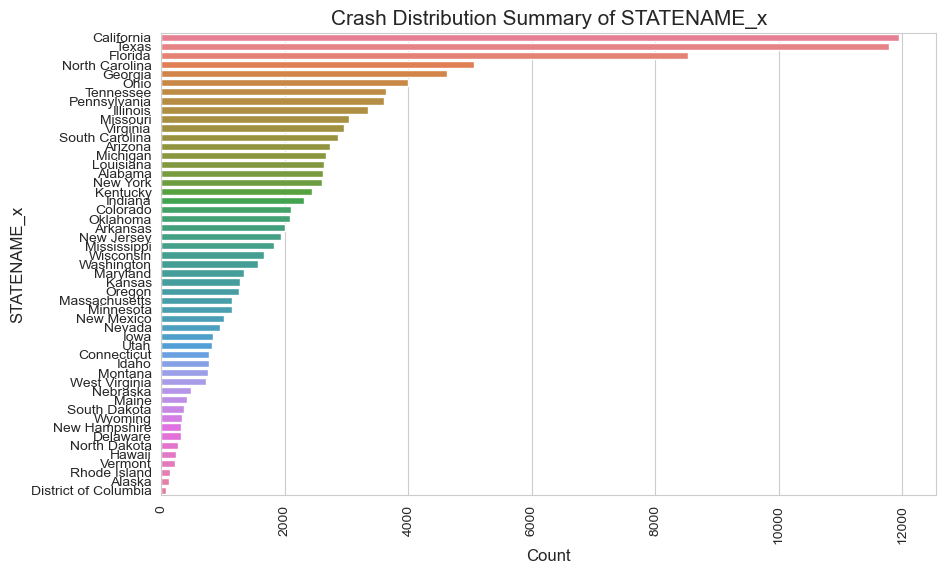

In [22]:
sns.set_style("whitegrid")

# Function to create bar plots for categorical variables
def plot_categorical_distribution(data, column_name, plot_size=(10, 6), rotation_angle=90):
    plt.figure(figsize=plot_size)
    ax = sns.countplot(data=data, y=column_name, order=data[column_name].value_counts().index,  palette="husl")
    ax.set_title(f'Crash Distribution Summary of {column_name}', fontsize=15)
    ax.set_ylabel(column_name, fontsize=12)
    ax.set_xlabel('Count', fontsize=12)
    plt.xticks(rotation=rotation_angle)
    plt.show()

# Plot the distribution of STATENAME_x
plot_categorical_distribution(df, 'STATENAME_x')

/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_5584/2693093590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, y=column_name, order=data[column_name].value_counts().index,  palette="husl")


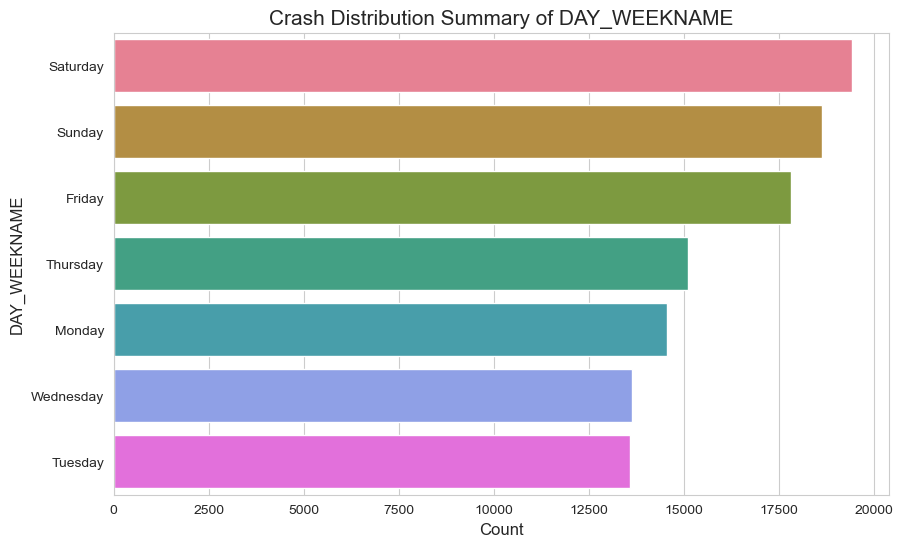

In [23]:
plot_categorical_distribution(df, 'DAY_WEEKNAME', rotation_angle=0)


/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_5584/2693093590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, y=column_name, order=data[column_name].value_counts().index,  palette="husl")


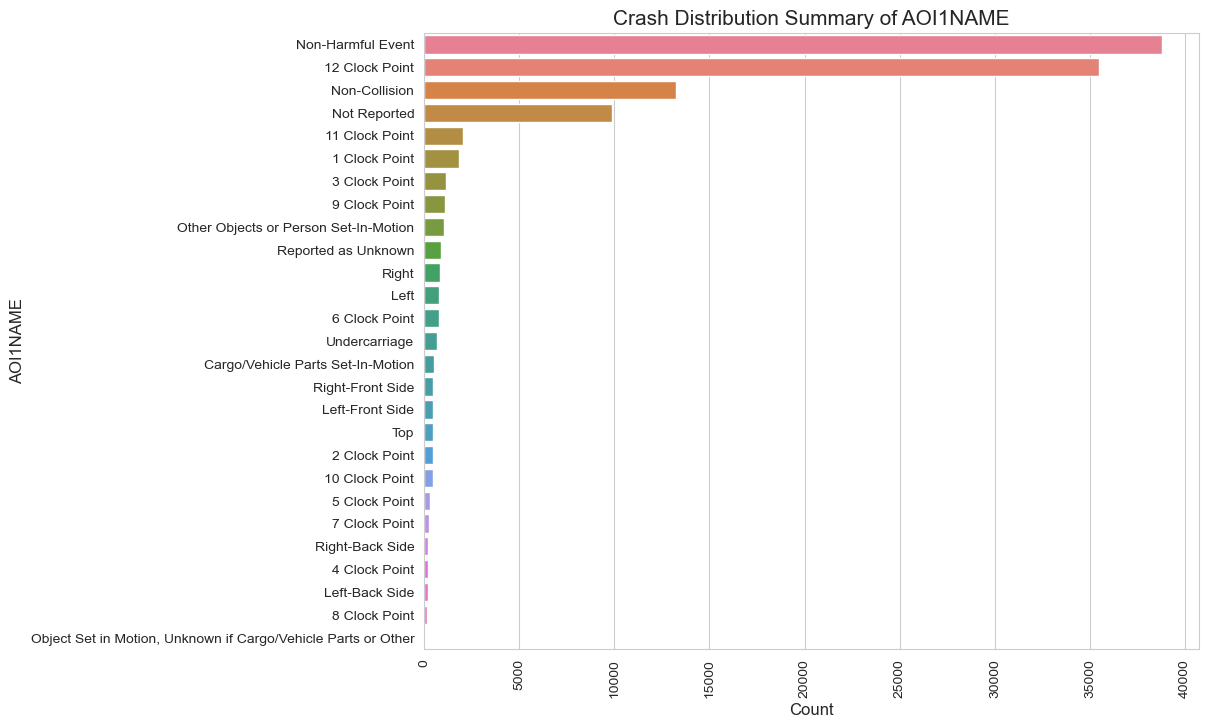

In [24]:

plot_categorical_distribution(df, 'AOI1NAME', plot_size=(10, 8))


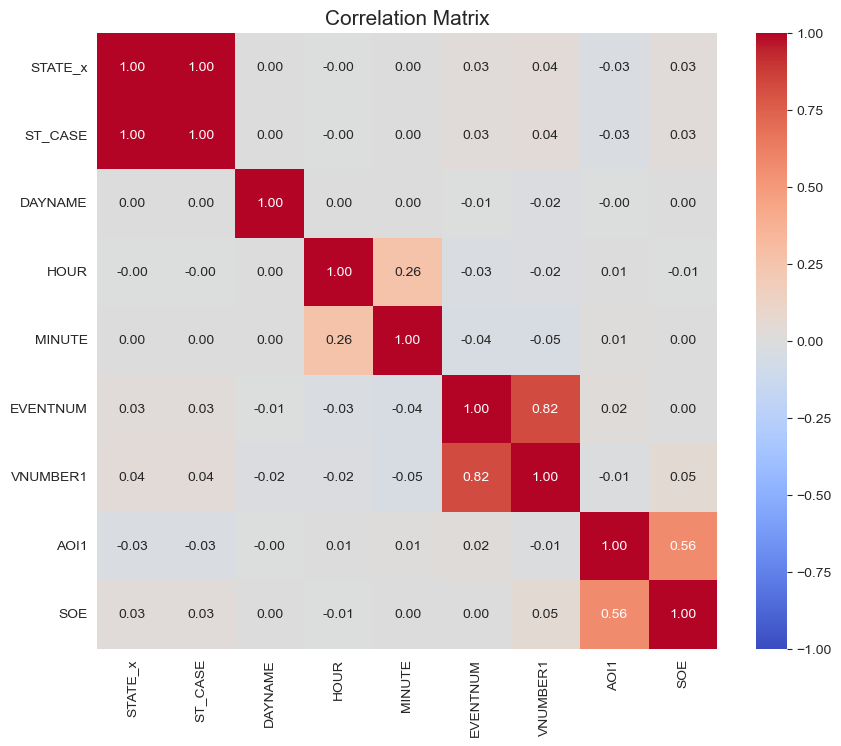

In [25]:
# Calculate the correlation matrix for Step 4
correlation_matrix = numerical_vars.corr()

correlation_matrix
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
ax.set_title('Correlation Matrix', fontsize=15)
plt.show()


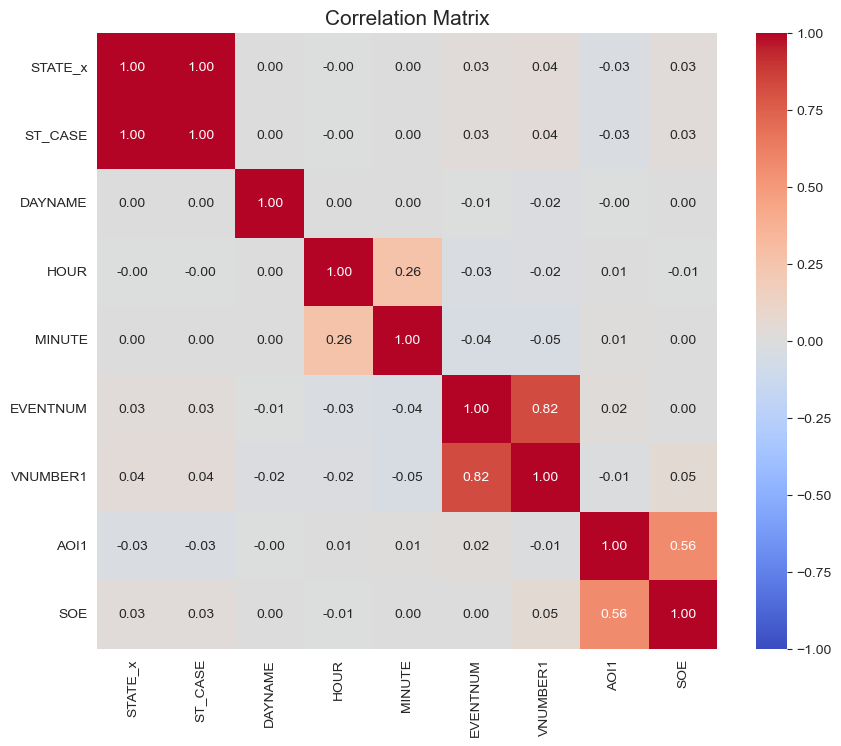

In [26]:

plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
ax.set_title('Correlation Matrix', fontsize=15)
plt.show()


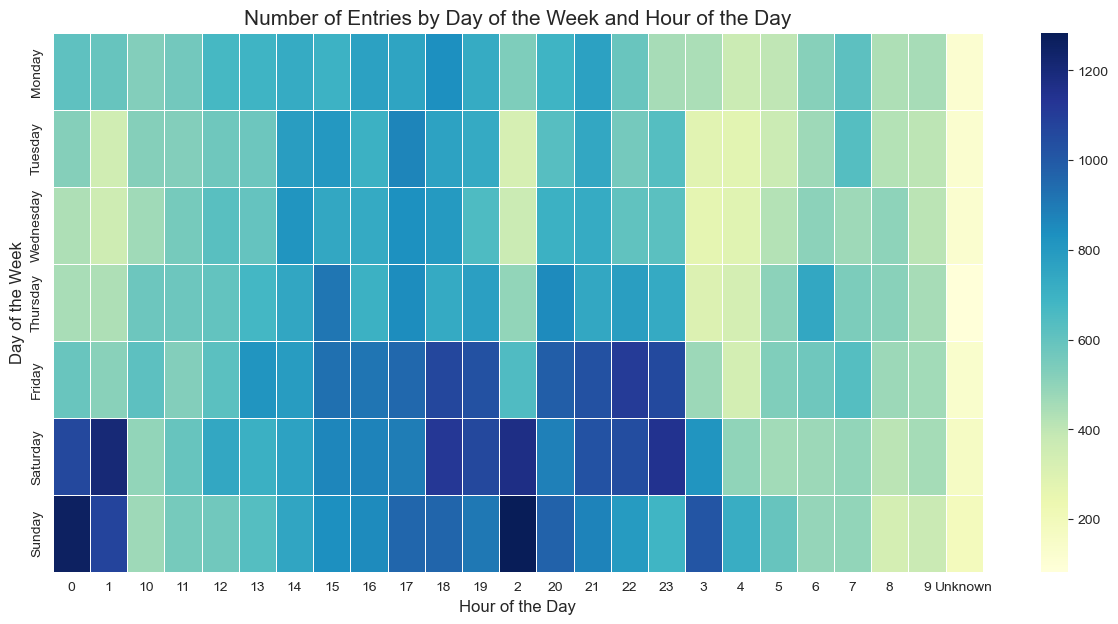

In [27]:
# handle the 99 (unknown) values
df['HOUR'] = df['HOUR'].astype(str).replace('99', 'Unknown')

# Create a pivot table to count the number of DAY_WEEKNAME and HOUR
hour_weekday_pivot = pd.pivot_table(df, index='DAY_WEEKNAME', columns='HOUR', aggfunc='size', fill_value=0)

# Order the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_weekday_pivot = hour_weekday_pivot.reindex(days_order)

plt.figure(figsize=(15, 7))
ax = sns.heatmap(hour_weekday_pivot, cmap="YlGnBu", linewidths=.5)
ax.set_title('Number of Entries by Day of the Week and Hour of the Day', fontsize=15)
ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_ylabel('Day of the Week', fontsize=12)
plt.show()



Hypothesis Generation
Based on the exploratory data analysis we've conducted so far, here are some potential hypotheses and questions:

Time of Day and Incidents:

Hypothesis: There are more incidents in the afternoon and evening compared to other times of the day.
Potential Analysis: Investigate if certain types of incidents are more likely to occur during these times.
Weekend Driving Behavior:

Hypothesis: Driving behavior during the weekends, especially late at night and in the early morning hours, leads to more incidents.
Potential Analysis: Examine the types of incidents that occur during these times and if they are different from weekday incidents.
State-wise Distribution:

Question: Why do some states have significantly more incidents recorded in the dataset? Is it due to population, traffic volume, or data collection methods?
Potential Analysis: Normalize the data by population or traffic volume to better understand the state-wise distribution.
Impact Areas:

Hypothesis: Certain areas of impact, such as the "Non-Harmful Event" and "12 Clock Point", are more common.
Potential Analysis: Investigate the circumstances that lead to these common impact areas.
Sequence of Events:

Hypothesis: The "Motor Vehicle In-Transport" event is the most common sequence of events leading to incidents.
Potential Analysis: Explore what specific situations or factors contribute to this sequence of events.

## Grouping by State
California and Texas have the highest number of entries, with 11,952 and 11,787 incidents respectively.
States like Alaska, District of Columbia, and Rhode Island have the lowest number of entries, all below 150 incidents.

/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_5584/29044026.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=state_group.index, y=state_group.values, palette="husl")


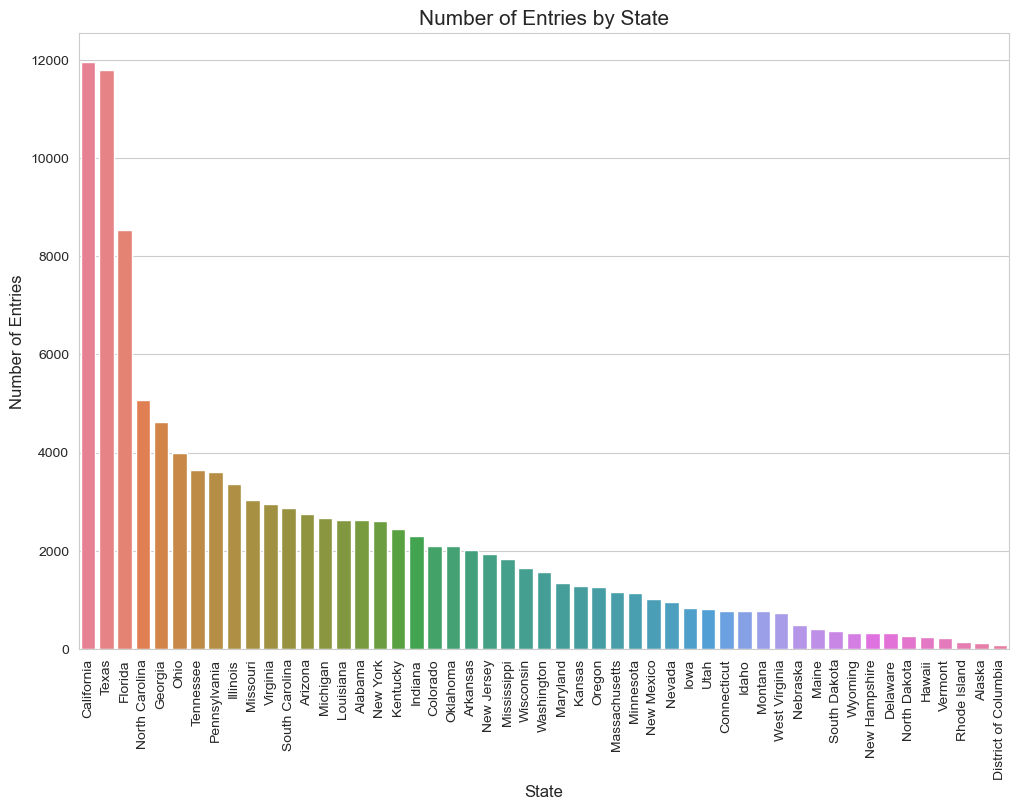

In [28]:
# Group the data by state and 
# calculate the total number of entries for each state
state_group = df.groupby('STATENAME_x').size().sort_values(ascending=False)

state_group

plt.figure(figsize=(12, 8))

# Create a bar plot for the number of entries by state
ax = sns.barplot(x=state_group.index, y=state_group.values, palette="husl")

ax.set_title('Number of Entries by State', fontsize=15)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Number of Entries', fontsize=12)
plt.xticks(rotation=90)
plt.show()



## Grouping by Time of the Day

/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_5584/3951407133.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=time_of_day_group.index, y=time_of_day_group.values, palette="husl")


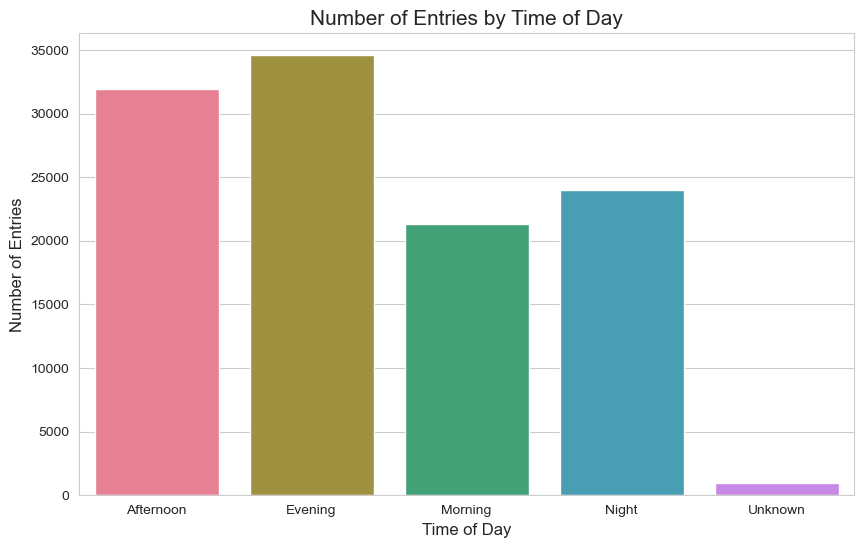

In [29]:
# Convert HOUR back to numeric, treating "Unknown" as a missing value
df['HOUR'] = pd.to_numeric(df['HOUR'], errors='coerce')

# Define a function to categorize the time of day
def categorize_time_of_day(hour):
    if pd.isna(hour):
        return "Unknown"
    elif 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 24:
        return "Evening"
    else:
        return "Night"

# Apply the function to create a new variable "TIME_OF_DAY"
df['TIME_OF_DAY'] = df['HOUR'].apply(categorize_time_of_day)

# Group the data by "TIME_OF_DAY" and calculate the total number of entries for each time segment
time_of_day_group = df.groupby('TIME_OF_DAY').size().sort_index()

time_of_day_group

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a bar plot for the number of entries by time of day
ax = sns.barplot(x=time_of_day_group.index, y=time_of_day_group.values, palette="husl")

# Set the title and labels
ax.set_title('Number of Entries by Time of Day', fontsize=15)
ax.set_xlabel('Time of Day', fontsize=12)
ax.set_ylabel('Number of Entries', fontsize=12)

# Show the plot
plt.show()



Step 7 

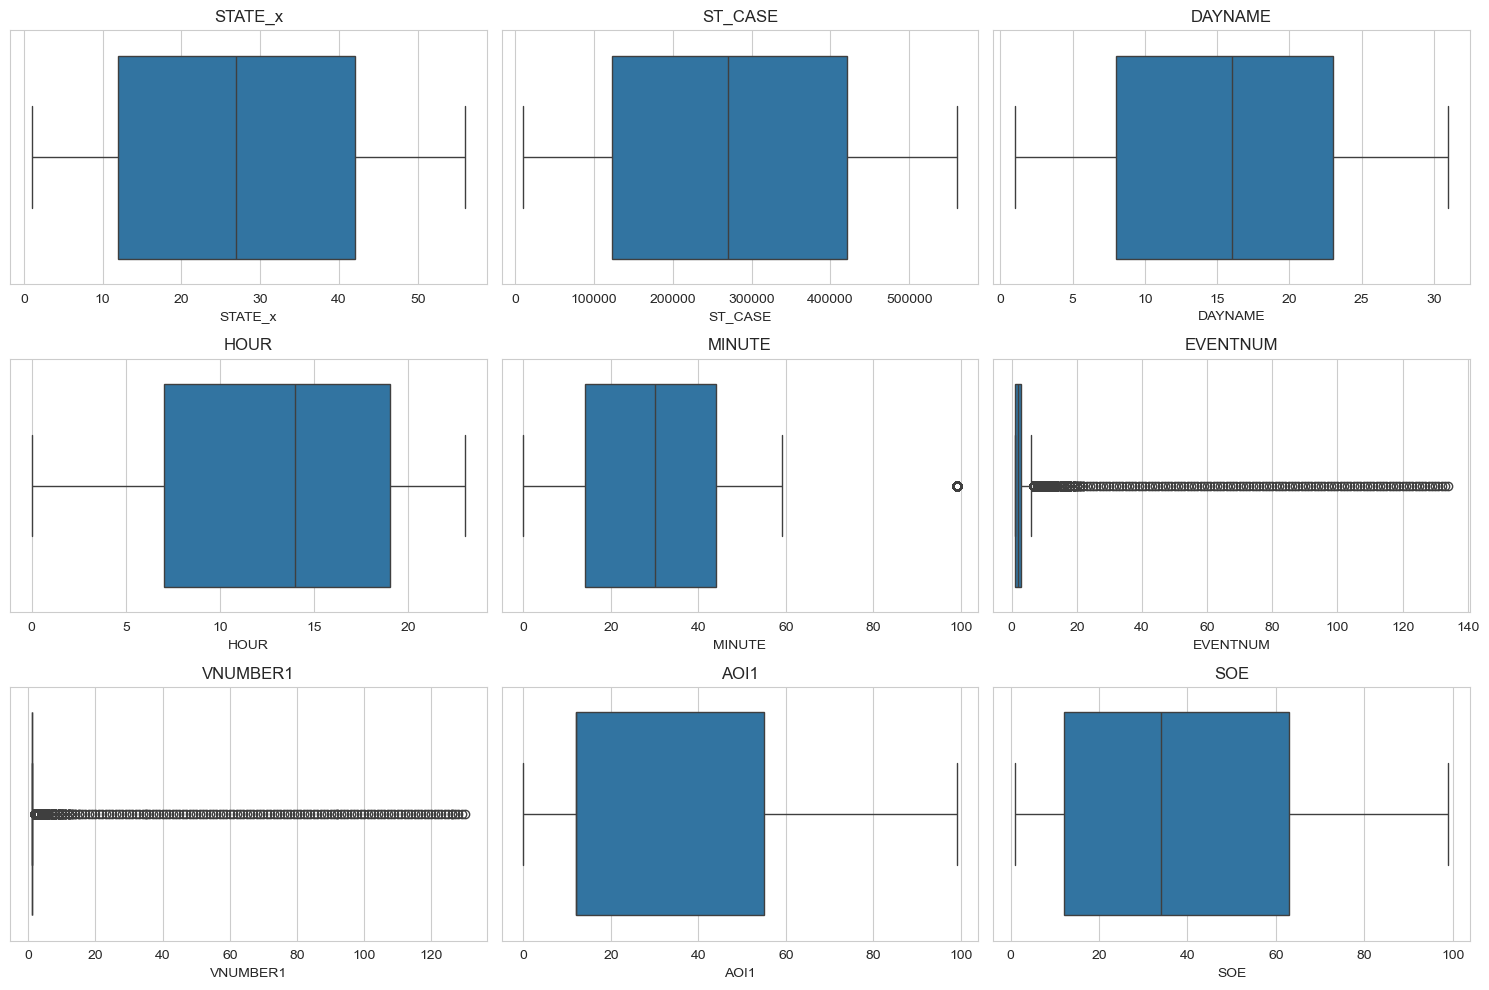

In [30]:

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_vars.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


EVENTNUM, VNUMBER1, AOI1, SOE: These variables have a significant number of high values that could be considered outliers. However, without more context on what these numbers represent, it’s challenging to definitively label them as outliers.
To properly handle the potential outliers, we would need additional context on the data and the variables, especially for the ones with coded values (EVENTNUM, VNUMBER1, AOI1, SOE).

## Data Cleaning for Naïve Bayes

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc



data = pd.read_csv('Data/FARS2021NationalCSV/accident.csv', encoding='ISO-8859-1')

Next is to create a new column that calculate the time gap between the notification time and the arrival time

In [32]:
# Define a function to convert hours and minutes into minutes since the start of the day
def convert_to_minutes(hour_col, min_col):
    return hour_col * 60 + min_col

# Convert notification time and arrival time into minutes
data['NOT_MINUTES'] = convert_to_minutes(data['NOT_HOUR'], data['NOT_MIN'])
data['ARR_MINUTES'] = convert_to_minutes(data['ARR_HOUR'], data['ARR_MIN'])

# Calculate the time gap
data['TIME_DIFF'] = data['ARR_MINUTES'] - data['NOT_MINUTES']

# Handling cases where the time difference is negative due to crossing midnight
# Assuming that EMS response times will be within a 24-hour period
data['TIME_DIFF'] = data['TIME_DIFF'].apply(lambda x: x + (1440 if x < 0 else 0))

# Create the binary target variable
data['EMS_MORE_THAN_10_MIN'] = (data['TIME_DIFF'] > 10).astype(int)

# Display the new columns
data[['NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'TIME_DIFF', 'EMS_MORE_THAN_10_MIN']].head()


,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,TIME_DIFF,EMS_MORE_THAN_10_MIN
0,22,13,22,25,12,1
1,99,99,19,9,-3450,0
2,9,29,9,40,11,1
3,16,20,16,28,8,0
4,22,20,22,30,10,0


Here we have some rows that notification time is 99, which indicates invalid time, we will remove it first

In [33]:
# Remove records with placeholder values for hours or minutes (assuming '99' is the placeholder value)
valid_data = data[(data['NOT_HOUR'] != 99) & (data['ARR_HOUR'] != 99)]

Here, for feature selection, there are many possible factors that affect the time EMS took on the road. In addition, there are many dynamic factors that could possibly affect the time as well, and as of current time, there is no way to record every single one of them. What we can do right now is to record those data that might affect the traffic flow, and applied those as features.

0.47060544018718925
              precision    recall  f1-score   support

           0       0.79      0.31      0.45      2354
           1       0.35      0.82      0.49      1065

    accuracy                           0.47      3419
   macro avg       0.57      0.56      0.47      3419
weighted avg       0.65      0.47      0.46      3419



Text(72.72222222222221, 0.5, 'True Label')

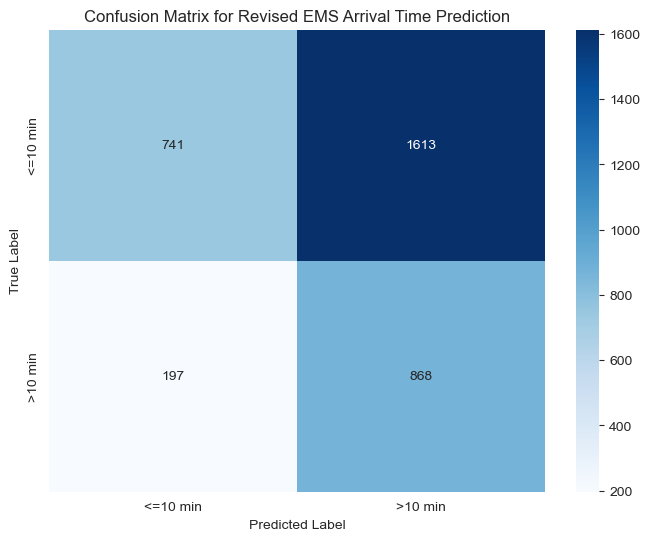

In [39]:
# Redefine the feature selection without the specified columns
revised_features = [
    'MONTH', 'DAY_WEEK', 'HOUR', 'MINUTE', 'ROUTE', 'TYP_INT', 
    'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER'
]


selected_features_revised = valid_data[revised_features].dropna(axis=1, how='any')

# Define the target variable
y_revised = valid_data['EMS_MORE_THAN_10_MIN']

# Split the revised data into training and testing sets
X_train_revised, X_test_revised, y_train_revised, y_test_revised = train_test_split(
    selected_features_revised, y_revised, test_size=0.2, random_state=0)

model_revised = GaussianNB()

# Train the revised model
model_revised.fit(X_train_revised, y_train_revised)

# Predict on revised test data
y_pred_revised = model_revised.predict(X_test_revised)

cm_revised = confusion_matrix(y_test_revised, y_pred_revised)

accuracy_revised = accuracy_score(y_test_revised, y_pred_revised)
report_revised = classification_report(y_test_revised, y_pred_revised)

print(accuracy_revised)
print(report_revised)

# Plotting the confusion matrix for the revised model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_revised, annot=True, fmt='d', cmap='Blues', xticklabels=['<=10 min', '>10 min'], yticklabels=['<=10 min', '>10 min'])
plt.title('Confusion Matrix for Revised EMS Arrival Time Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


So Based on the result, we can tell that

Precision for class 0 (EMS took 10 minutes or less): 79%

Recall for class 0: 31%

F1-score for class 0: 45%

Precision for class 1 (EMS took more than 10 minutes): 35%

Recall for class 1: 82%

F1-score for class 1: 49%

From the confusion matrix, The high number of false positives (802) relative to true negatives (346) indicates that the model is overly pessimistic about the EMS response time, often predicting delays where there are none.
The model has a better true positive rate, with 893 correctly predicted delays, but this comes at the cost of a high false-positive rate.
The false-negative count (196) is lower than the false positives, which suggests that when the model predicts a quick response, it is somewhat more likely to be correct. However, in emergency response situations, even a small number of false negatives can be critical.

our model is trying to predict whether an emergency medical service (EMS) will take more than 10 minutes to arrive at the scene of an accident.

This accuracy tells us what portion of the total predictions made by the model were correct. Our model has an accuracy of approximately 47.06%, which means that about 47 out of every 100 predictions it makes about EMS arrival times are correct. It's not very high, so the model is not very reliable in its current state.

Precision tells us how often the model is correct when it predicts a certain event. For instance, when our model predicts that the EMS will take more than 10 minutes to arrive, it is correct 35% of the time. Conversely, when it predicts that EMS will take 10 minutes or less, it is correct 79% of the time. High precision for a category means that when the model predicts that category, it's usually right.

The F1-score is 49%, and for predictions of 10 minutes or less, it's 45%. This suggests that the model is slightly better at predicting longer arrival times than shorter ones, but it still isn't highly accurate in either case.

Given the accuracy and the confusion matrix, we see that the model has an accuracy of approximately 47.06% on the test set, which is not very high and is close to random guessing. This could indicate that the model is underfitting. It is too simplistic and not capturing the underlying patterns in the data well enough to make accurate predictions on either the training or the test set.

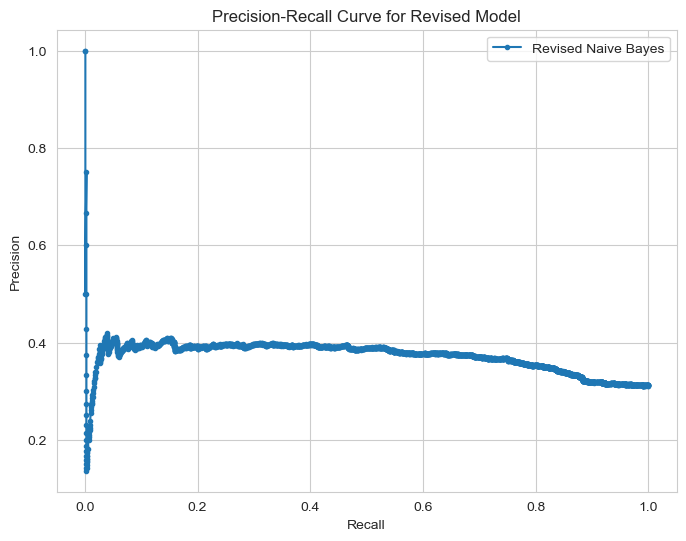

In [43]:

# Load the dataset
pdf_path = ('Data/FARS2021NationalCSV/accident.csv')
data = pd.read_csv(pdf_path, encoding='ISO-8859-1')

# Preprocess the data as before
data['NOT_MINUTES'] = data['NOT_HOUR'] * 60 + data['NOT_MIN']
data['ARR_MINUTES'] = data['ARR_HOUR'] * 60 + data['ARR_MIN']
data['TIME_DIFF'] = data['ARR_MINUTES'] - data['NOT_MINUTES']
data['TIME_DIFF'] = data['TIME_DIFF'].apply(lambda x: x + (1440 if x < 0 else 0))
data['EMS_MORE_THAN_10_MIN'] = (data['TIME_DIFF'] > 10).astype(int)

# Remove invalid records (where NOT_HOUR or ARR_HOUR is 99)
valid_data = data[(data['NOT_HOUR'] != 99) & (data['ARR_HOUR'] != 99)]

# Redefine the feature selection without the specified columns
revised_features = [
    'MONTH', 'DAY_WEEK', 'HOUR', 'MINUTE', 'ROUTE', 'TYP_INT', 
    'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER'
]

# Prepare the feature matrix and target vector
selected_features_revised = valid_data[revised_features].dropna(axis=1, how='any')
y_revised = valid_data['EMS_MORE_THAN_10_MIN']

# Encode categorical variables
label_encoders = {}
for column in selected_features_revised.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    selected_features_revised[column] = label_encoders[column].fit_transform(selected_features_revised[column])

# Split the dataset into train and test sets
X_train_revised, X_test_revised, y_train_revised, y_test_revised = train_test_split(
    selected_features_revised, y_revised, test_size=0.2, random_state=0)

# Initialize and train the Gaussian Naive Bayes model
model_revised = GaussianNB()
model_revised.fit(X_train_revised, y_train_revised)

# Predict probabilities for the test set
y_scores_revised = model_revised.predict_proba(X_test_revised)[:, 1]

# Compute precision-recall pairs for different probability thresholds
precision_revised, recall_revised, thresholds_revised = precision_recall_curve(y_test_revised, y_scores_revised)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_revised, precision_revised, marker='.', label='Revised Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Revised Model')
plt.legend()
plt.grid(True)
plt.show()


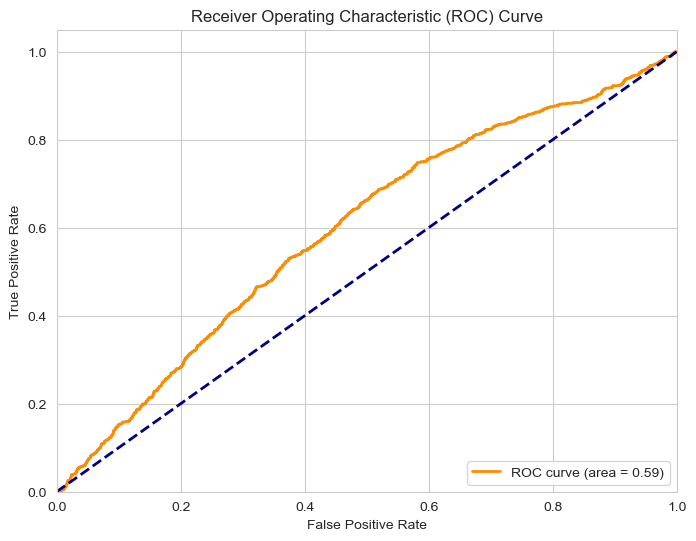

In [46]:
fpr, tpr, roc_thresholds = roc_curve(y_test_revised, y_scores_revised)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Naïve Bayes for labeled text data